# Frame likelihood

In [1]:
using BSON: @save, @load
using Statistics
using DelimitedFiles
using Printf
using MDToolbox
using StatsBase 
using LinearAlgebra
using Random
using Plots

include("../src/afm.jl")

baumwelch (generic function with 1 method)

In [2]:
nq = 576
qs = readdlm("../data/quaternion/QUATERNION_LIST_$(nq)_Orient")
models = load_model("../data/t1r/cluster.pdb");
nmodel = size(models, 1)

test_radius = 25
pred_radii = [15, 18, 20, 25, 30, 32, 35]
sigma_noise = 3
sharpness = 10
nframe = 100

100

In [10]:
seed = MersenneTwister(334)
extracted_qs = sample(seed, 1:576, 50, replace=false);

In [11]:
extracted_qs[1]

240

In [12]:
function logsumexp(x)
    max_x = maximum(x)
    exp_x = exp.(x .- max_x)
    return log(sum(exp_x)) .+ max_x
end

logsumexp (generic function with 1 method)

In [251]:
xs = []
iq_true = extracted_qs[1]
iframe = 1

for r in pred_radii
    @load "data/result/test_radius_$(test_radius)/pred_radius_$(r)/sharpness_$(sharpness)/q_$(nq)/iq_$(iq_true)_noise_$(sigma_noise)_nframe_$(nframe).bson" params r
    #id = argmax(r.all[iframe])
    x = dropdims(r.all[iframe], dims=3)
    #x .= exp.(x)
    #x .= x ./ sum(x)
    x .= x .- logsumexp(x)
    @show sum(exp.(x))
    push!(xs, x)
end

sum(exp.(x)) = 1.0
sum(exp.(x)) = 1.0
sum(exp.(x)) = 1.0
sum(exp.(x)) = 1.0
sum(exp.(x)) = 1.0
sum(exp.(x)) = 1.0
sum(exp.(x)) = 1.0


In [252]:
@load "data/test_case/radius_$(test_radius)/sharpness_$(sharpness)/q_$(nq)/iq_$(iq_true)_noise_$(sigma_noise)_nframe_$(nframe).bson" afms param imodel_array dxdy_array

In [253]:
@load "../data/t1r/t1r_centroid.bson" centroid

In [254]:
sum(models.xyz[50, :] .* pmode[:, 1])

-610.1063231592823

In [268]:
ps = [];

for i in 1:length(pred_radii)
    pc1 = []
    likelihood = []
    for iq = 1:nq
        for imodel = 1:size(xs[1], 1)
            push!(pc1, centroid[imodel, 1])
            push!(likelihood, xs[i][imodel, iq])
        end
    end
    p = scatter(likelihood, pc1, 
        label=nothing, framestyle=:box,
        xlabel="log likelihood", ylabel="1st principal component [A]",
        markersize=4, markerstrokewidth=0,
        size=(600, 400), dpi=300,
        left_margin=Plots.Measures.Length(:mm, 10.0),
        right_margin=Plots.Measures.Length(:mm, 10.0),
        bottom_margin=Plots.Measures.Length(:mm, 10.0))
    p = plot!(range(-3000, maximum(likelihood), 10), fill(centroid[imodel_array[iframe], 1], 10), linewidth=2, color=:red, label=nothing,
                xlims=(-3000, 100), ylims=(minimum(centroid)-10.0, maximum(centroid)+10.0))
    #p = plot!(fill(maximum(likelihood)-log(100), 10), range(minimum(pc1), maximum(pc1), 10), color=:black, linestyle=:dash, 
    #  label=nothing)
    push!(ps, p)
end

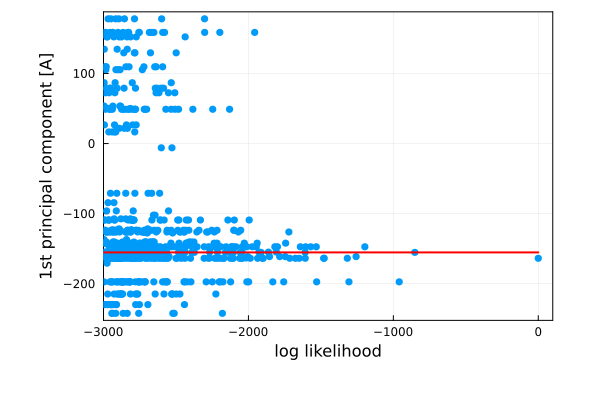

In [270]:
plot(ps[6])
#plot!(range(-300, -100, 10), fill(centroid[imodel_array[iframe], 1], 10), linewidth=2, color=:red, label=nothing,
#      xlims=(-1000, 100))

In [271]:
for i in 1:length(ps)
    savefig(ps[i], "fig04_structure_$(pred_radii[i])A.png")
end